# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [184]:
import pandas as pd

df = pd.read_csv('train.csv') 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [185]:
def num_nans(df):
    row_sum_Nans  = df.isnull().sum(axis=1)
    return (row_sum_Nans == 0).sum(axis=0)

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 183 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [186]:
def drop_na(df):
    column_sum_Nans = df.isnull().sum(axis=0)
    column_index = column_sum_Nans.index[column_sum_Nans > 200]
    return df.drop(column_index, axis= 1)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [187]:
def to_numerical(df):
    df.replace({'male': 0, 'female': 1}, inplace=True)
    return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [188]:
def extract_names(df):
    # Remove parenthesis from name column
    new_df = df["Name"].str.replace(r"\(.*\)","")
    # Get Last Name
    new_df = new_df.str.split(",", n=1, expand=True)
    df["Last Name"] = new_df[0]
    # Get Title
    new_df = new_df[1].str.split(". ", n=1, expand=True)
    df["Title"] = new_df[0]
    # Get First name and Middle name
    new_df = new_df[1].str.split(" ", n=1, expand=True)
    df["First Name"] = new_df[0]
    df["Middle Name"] = new_df[1]
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

/var/folders/bh/lvn75fgs5z703r985tw80gvr0000gn/T/ipykernel_42298/3413876112.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df = df["Name"].str.replace(r"\(.*\)","")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [189]:
def replace_with_mean(df):
    mean = df['Age'].mean()
    df['Age'] = df['Age'].fillna(value=mean)
    return df['Age']

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

Text(0, 0.5, 'Age')

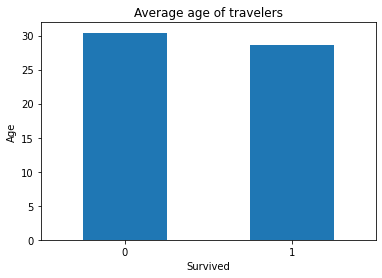

In [190]:
means = df.groupby('Survived')['Age'].mean()
ax = means.plot.bar(rot=0, title = "Average age of travelers")
ax.set_ylabel("Age")


Both the survived and non survived travelers are on average quite young.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

Text(0, 0.5, 'Percentage(%)')

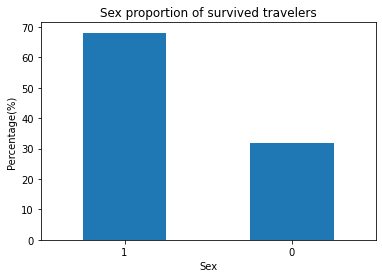

In [191]:
survived_df = df.loc[df['Survived'] == 1]['Sex'].value_counts(normalize = True) *100
ax = survived_df.plot.bar(rot=0, title="Sex proportion of survived travelers")
ax.set_xlabel("Sex")
ax.set_ylabel("Percentage(%)")

Among survived travelers, females outweigh in number the males. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

Text(0, 0.5, 'Percentage(%)')

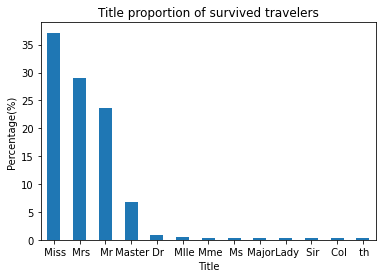

In [192]:
title_df = df.loc[df['Survived'] == 1]['Title'].value_counts(normalize = True) *100
ax = title_df.plot.bar(rot=0, title="Title proportion of survived travelers")
ax.set_xlabel("Title")
ax.set_ylabel("Percentage(%)")

Among survived travelers, females (either Miss or Mrs) outweigh in numbers the males (either Mr or Master). Among the rest titles, they are a minority of those survived.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

Text(0, 0.5, 'Average Fare')

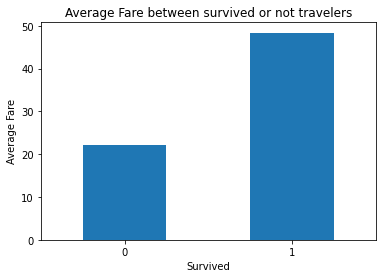

In [193]:
means = df.groupby('Survived')['Fare'].mean()
ax = means.plot.bar(rot=0, title="Average Fare between survived or not travelers")
ax.set_xlabel("Survived")
ax.set_ylabel("Average Fare")

Among all travelers, it seems that those who survived had the highest fares on average. In simpler words, the rich survived while the poor did not. 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

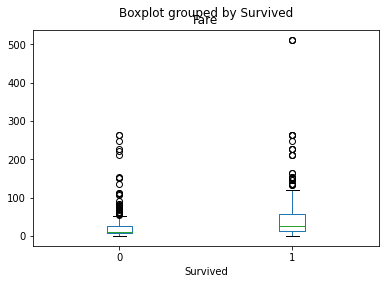

In [194]:
df.boxplot(by ='Survived', column =['Fare'], grid = False)

Among survived travelers, their middle value of fare is close to 50. The minimum value of fares is closer to the middle value rather than the maximum value. There are outliers values of fares above maximum value. 
Among non-survived travelers, their middle value of fare is close to 20. The minimum value of fares is closer to the middle value rather than the maximum value. There are outliers values of fares above maximum value. 
Comparing both survived and non survived travelers, we draw the conclusion that the fares of survived travelers were higher than the non-survived on average. 

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [195]:
df['Fare'] = df['Fare'] - df['Fare'].mean()
standard_deviation = df['Fare'].std()
df['Fare'] = df['Fare'] / standard_deviation
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,Allen,Mr,William,Henry


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [196]:
numerical_data_types = ['int64','float64']
new_df = df.select_dtypes(numerical_data_types)
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,-0.502163
1,2,1,1,1,38.0,1,0,0.786404
2,3,1,3,1,26.0,0,0,-0.488580
3,4,1,1,1,35.0,1,0,0.420494
4,5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [197]:
from scipy.spatial.distance import cdist
import numpy as np 

def N_most_similar(df, N):
    # Remove all non numerical_data_types from initial dataframe df
    numerical_data_types = ['int64','float64']
    new_df = df.select_dtypes(numerical_data_types).drop('PassengerId', axis =1)
    # Compute the Euclidean distance of all rows and build a dataframe (euclid_df) with the results
    table = cdist(new_df, new_df, 'euclid')
    x_axis = table.shape[0]
    table[np.tril_indices(x_axis)] = -1
    euclid_df = pd.DataFrame(table)
    # Get the indexes of the N maximum euclidean distances, 
    # apply them to initial dataframe (df) and return a list with N most similar passengers.
    ind = euclid_df.stack().nlargest(N).index.tolist()
    similar_pairs = []
    for i in range(N):
        similar_pairs.append(df.loc[ind[i], ["Name"]]['Name'].tolist())
    return similar_pairs

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: [['Barkworth, Mr. Algernon Henry Wilson', 'Thomas, Master. Assad Alexander'], ['Barkworth, Mr. Algernon Henry Wilson', 'Hamalainen, Master. Viljo'], ['Baclini, Miss. Helene Barbara', 'Barkworth, Mr. Algernon Henry Wilson']]


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [198]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

l = ["Python","Data Science","Data Analysis","Machine Learning","Deep Learning"]

python = get(l[0])
data_science = get(l[1])
data_analytics = get(l[2])
machine_learning = get(l[3])
deep_learning = get(l[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [199]:
python_df = pd.json_normalize(python['items'])
python_df.to_csv('python.csv')
data_science_df = pd.json_normalize(data_science['items'])
data_science_df.to_csv('data_science.csv')
data_analytics_df = pd.json_normalize(data_analytics['items'])
data_analytics_df.to_csv('data_analytics.csv')
machine_learning_df = pd.json_normalize(machine_learning['items'])
machine_learning_df.to_csv('machine_learning.csv')
deep_learning_df = pd.json_normalize(deep_learning['items'])
deep_learning_df.to_csv('deep_learning.csv')

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [200]:
renamed_columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}
python_df = python_df.rename(columns=renamed_columns)
data_science_df = data_science_df.rename(columns=renamed_columns)
data_analytics_df = data_analytics_df.rename(columns=renamed_columns)
machine_learning_df = machine_learning_df.rename(columns=renamed_columns)
deep_learning_df = deep_learning_df.rename(columns=renamed_columns)


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [201]:
python_df.insert(loc=0, column="Topic", value="Python")
data_science_df.insert(loc=0, column="Topic", value="Data Science")
data_analytics_df.insert(loc=0, column="Topic", value="Data Analytics")
machine_learning_df.insert(loc=0, column="Topic", value="Machine Learning")
deep_learning_df.insert(loc=0, column="Topic", value="Deep Learning")

frames = [python_df, data_science_df, data_analytics_df, machine_learning_df, deep_learning_df]
total_df = pd.concat(frames)
total_df.to_csv('total.csv')

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [202]:
def search_on_title(df, word):
    return df[df['Title'].str.contains(word)]


search_on_title(total_df, 'Data').head()

,Topic,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink
0,Data Science,books#volume,vfi3DQAAQBAJ,AXZkeOcKA+c,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"[Hadley Wickham, Garrett Grolemund]","""O'Reilly Media, Inc.""",2016-12-12,"""This book introduces you to R, RStudio, and t...",...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Science,books#volume,TFpVDwAAQBAJ,c1Y95TWq/Fk,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,"[John D. Kelleher, Brendan Tierney]",MIT Press,2018-04-13,A concise introduction to the emerging field o...,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Science,books#volume,xb29DwAAQBAJ,mYQv8HpZ4PE,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,[Rafael A. Irizarry],CRC Press,2019-11-20,Introduction to Data Science: Data Analysis an...,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,http://books.google.com/books/download/Introdu...
3,Data Science,books#volume,6omNDQAAQBAJ,znKw1nNfz9I,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,[Jake VanderPlas],"""O'Reilly Media, Inc.""",2016-11-21,"For many researchers, Python is a first-class ...",...,False,False,59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,NaN
4,Data Science,books#volume,JYodCAAAQBAJ,Vo6xOuzAHxI,https://www.googleapis.com/books/v1/volumes/JY...,Data Science from Scratch,[Joel Grus],"""O'Reilly Media, Inc.""",2015-04-14,"Data science libraries, frameworks, modules, a...",...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [203]:
def search_on_authors(df):
    # Build a mask based on if "Authors" column 
    # contains first or last names starting with 'E' 
    # and apply it on dataframe
    mask = df['Authors'].apply(func=check_authors)
    return df[mask]

def check_authors(authors):
    # Check seperately if there are one or more authors 
    # and apply start_with_E function
    if len(authors) == 1:
        return start_with_E(authors[0])
    else:
        for author in authors:
            if start_with_E(author):
                return True            
    return False

def start_with_E(author):
    # Check if their first or last names 
    # start with 'E' for the inspected author
    name = author.split(" ")
    first_name = name[0]
    last_name = name[-1]
    if first_name[0] == "E" or last_name[0] == "E":
        return True
    return False
    

search_on_authors(total_df).head()

,Topic,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,accessInfo.pdf.acsTokenLink
6,Data Science,books#volume,UG76DwAAQBAJ,wluLZUsqLXE,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",Routledge,2020-10-26,Data Science in Education Using R is the go-to...,...,False,False,48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,http://books.google.com/books/download/Data_Sc...
3,Machine Learning,books#volume,NP5bBAAAQBAJ,dYYa+Qhxtx8,https://www.googleapis.com/books/v1/volumes/NP...,Introduction to Machine Learning,[Ethem Alpaydin],MIT Press,2014-08-29,The goal of machine learning is to program com...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Machine Learning,books#volume,AGQ4DQAAQBAJ,9+9eaSRB9Ak,https://www.googleapis.com/books/v1/volumes/AG...,Machine Learning,[Ethem Alpaydin],MIT Press,2016-10-07,A concise overview of machine learning—compute...,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Deep Learning,books#volume,LrT4DwAAQBAJ,6N78CzMUy0M,https://www.googleapis.com/books/v1/volumes/Lr...,Introduction to Deep Learning,[Eugene Charniak],MIT Press,2019-01-29,A project-based guide to the basics of deep le...,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
